In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib inline

# DBSCAN implementation

In [2]:
class DBSCAN:
    
    def __init__(self, eps, min_pts):
        self.eps = eps
        self.min_pts = min_pts
            
    def rangeQuery(self, pid, distance):
        return np.where(distance[pid] <= self.eps)[0]
            
    def fit(self, X):
        
        n_rows, dims = X.shape
        c_id = 0
        
        #  0 - unclassified
        # -1 - Noise
        # >0 - cluster id the point belngs to
        lable = np.zeros(n_rows)
        
        # preconpute distance matrix
        distances = euclidean_distances(X)
        
        for n in range(n_rows):
            if lable[n] != 0:
                continue
            
            # get neighbours for point
            neighbours = self.rangeQuery(n, distance=distances)
            
            # density check
            if len(neighbours) < self.min_pts:
                lable[neighbours] = -1
                continue
            
            c_id += 1
            lable[n] = c_id
            
            # grow cluster
            idx = 0
            while idx < len(neighbours):
                _n = neighbours[idx]
                idx += 1
                
                # check if already processed
                if lable[_n] > 0:
                    continue
                    
                # add point to cluster
                lable[_n] = c_id
                _neighbours = self.rangeQuery(_n, distance=distances)
                
                # if core point, add to original neighbours
                if len(_neighbours) >= self.min_pts:
                    neighbours = np.concatenate((neighbours, _neighbours))

        return lable

### P5

In [7]:
df = pd.read_csv('../data/dbscan/dbscan.csv', index_col=1)

In [8]:
p5_X = df.iloc[:, 1:3].values

In [10]:
db = DBSCAN(7.5, 3)
p5_labels = db.fit(X=p5_X)

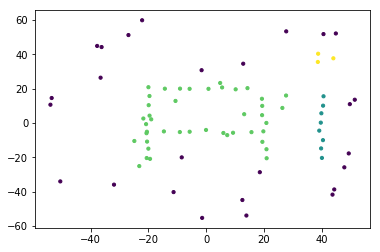

In [12]:
plt.scatter(p5_X[:, 0], p5_X[:, 1], c=p5_labels, s=10)

### P6